In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist

In [4]:
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

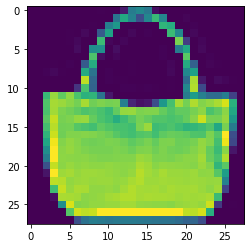

In [5]:
plt.imshow(x_train_full[100])
x_train_full.shape

In [6]:
y_train_full[100]

8

In [7]:
classes=["T-shirt/top","Trouser","PullOver","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]


In [8]:
x_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [9]:
 x_train_n=x_train_full/255.0
 x_test_n=x_test/255.0 

In [10]:
x_valid,x_train=x_train_n[:5000],x_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [11]:
x_test=x_test_n
x_test.shape
x_train.shape


(55000, 28, 28)

In [12]:
x_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [13]:
 np.random.seed(55)
 tf.random.set_seed(55)

In [14]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


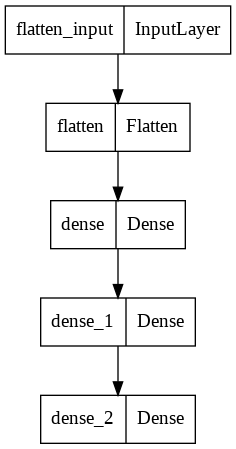

In [16]:
import pydot
keras.utils.plot_model(model)

In [17]:
weights,biases=model.layers[1].get_weights()

In [18]:
weights

array([[-0.05800167,  0.04037616, -0.07318367, ..., -0.01844524,
         0.06320025, -0.06994912],
       [-0.06360837, -0.0165102 , -0.0496527 , ..., -0.04532036,
         0.06672513, -0.02503778],
       [-0.00717035,  0.00582534, -0.01616232, ...,  0.02425043,
        -0.06237937,  0.0039803 ],
       ...,
       [-0.02060507, -0.03837863,  0.03797206, ..., -0.00296323,
        -0.0710569 ,  0.06237073],
       [-0.05818406, -0.04732392, -0.00545835, ...,  0.00808656,
         0.05703755,  0.04240891],
       [-0.0108964 , -0.01268313, -0.00367361, ...,  0.04812675,
         0.02593441,  0.01314421]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
x_train.shape

(55000, 28, 28)

In [23]:
model_history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7151 - accuracy: 0.7629 - val_loss: 0.5091 - val_accuracy: 0.8270
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4856 - accuracy: 0.8305 - val_loss: 0.4387 - val_accuracy: 0.8532
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4426 - accuracy: 0.8452 - val_loss: 0.4347 - val_accuracy: 0.8526
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4162 - accuracy: 0.8529 - val_loss: 0.4201 - val_accuracy: 0.8494
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3947 - accuracy: 0.8603 - val_loss: 0.3915 - val_accuracy: 0.8654
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3795 - accuracy: 0.8668 - val_loss: 0.3653 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3658 - accuracy: 0.8706 - val_loss: 0.3720 - val_accuracy:

In [24]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [25]:
model_history.history

{'loss': [0.7150974273681641,
  0.4855506718158722,
  0.4426174461841583,
  0.4161990284919739,
  0.3947104811668396,
  0.37950220704078674,
  0.3657708466053009,
  0.3537862300872803,
  0.3433605432510376,
  0.3344901204109192,
  0.3251045048236847,
  0.31627771258354187,
  0.30968931317329407,
  0.302285760641098,
  0.29537874460220337,
  0.29051482677459717,
  0.28334420919418335,
  0.2788209319114685,
  0.2737061381340027,
  0.26911717653274536,
  0.2636479139328003,
  0.25848183035850525,
  0.25386181473731995,
  0.2503606379032135,
  0.24572262167930603,
  0.241067573428154,
  0.23768597841262817,
  0.23433199524879456,
  0.2299705296754837,
  0.22600765526294708],
 'accuracy': [0.7629091143608093,
  0.8304727077484131,
  0.8451636433601379,
  0.8528545498847961,
  0.8603272438049316,
  0.8667818307876587,
  0.8705818057060242,
  0.8747636079788208,
  0.8772727251052856,
  0.880618155002594,
  0.8841454386711121,
  0.8862363696098328,
  0.8890363574028015,
  0.8921454548835754,
 

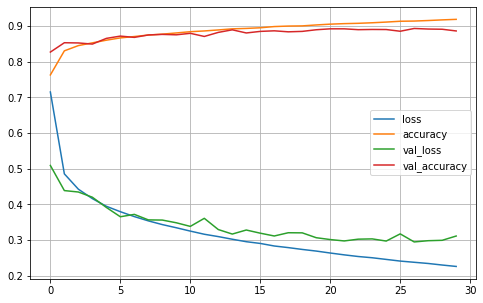

In [26]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)

plt.show()

In [27]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3440 - accuracy: 0.8757


[0.3440043032169342, 0.8756999969482422]

In [28]:
x_new=x_test[1000:1003]

In [29]:
y_proba=model.predict(x_new)
y_proba.round(2)

array([[0.36, 0.  , 0.  , 0.  , 0.  , 0.  , 0.64, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01]],
      dtype=float32)

In [30]:
y_pred=model.predict(x_new)
y_class=np.argmax(y_pred,axis=1)
y_class

array([6, 3, 5])

In [31]:
np.array(classes)[y_class]

array(['Shirt', 'Dress', 'Sandal'], dtype='<U11')

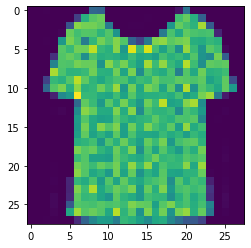

In [32]:
plt.imshow(x_test[1000])

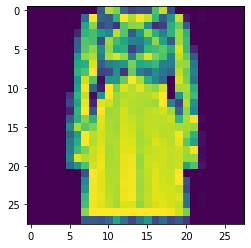

In [33]:
plt.imshow(x_test[1001])

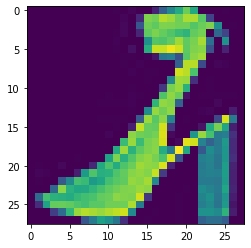

In [34]:
plt.imshow(x_test[1002])

In [35]:
from pathlib import Path

In [36]:
model_struct=model.to_json()
f=Path("mod_struct.json")
f.write_text(model_struct)
model.save_weights("fmnist_weights.h5")